In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
def hconcat_resize(img_list,
                   interpolation
                   = cv2.INTER_CUBIC):
      # take minimum heights
    h_min = min(img.shape[0]
                for img in img_list)

    # image resizing
    im_list_resize = [cv2.resize(img,
                       (int(img.shape[1] * h_min / img.shape[0]),
                        h_min), interpolation
                                 = interpolation)
                      for img in img_list]

    # return final image
    return cv2.hconcat(im_list_resize)

# Perspective Transformation Example - 1

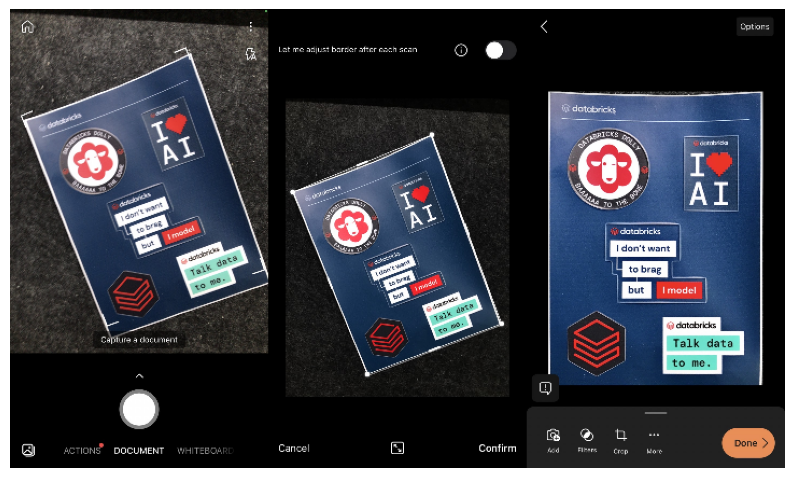

In [6]:
img1 = cv2.imread("./Homography/ms_lens_1.jpg")
img2 = cv2.imread("./Homography/ms_lens_2.jpg")
img3 = cv2.imread("./Homography/ms_lens_3.jpg")

concat_imgs = hconcat_resize([img1, img2, img3])

apr = 720 / concat_imgs.shape[1]
dim = (720, int(concat_imgs.shape[0] * apr))
concat_imgs = cv2.resize(concat_imgs, dim,cv2.INTER_CUBIC)

# Convert BGR (OpenCV) → RGB (Matplotlib)
concat_imgs_rgb = cv2.cvtColor(concat_imgs, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(concat_imgs_rgb)
plt.axis("off")
plt.show()

## Get 4 corners

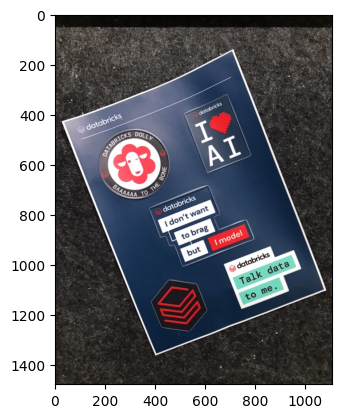

In [7]:
image_path = "./Homography/databricks.jpg"
image = cv2.imread(image_path)
fig = plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [8]:
def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [9]:
fig.canvas.mpl_disconnect(cid)

In [10]:
# blank_img = np.zeros((640,480,3), dtype=np.uint8)
# src_corners = np.float32([[262, 420], [853, 372], [238, 1275], [949, 1263]])
src_corners = np.float32([[30, 423], [712, 144], [406, 1367], [1081, 1103]])
dst_corners = np.float32([[0, 0], [480,0], [0, 640], [480, 640]]) # 640 x 480

M = cv2.getPerspectiveTransform(src_corners,dst_corners)
warped_img = cv2.warpPerspective(image, M, (480,640))

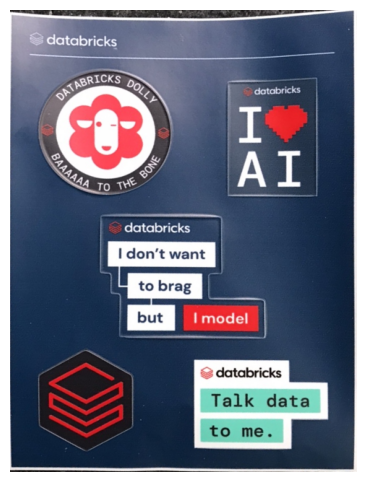

In [12]:
warped_img_rgb = cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(warped_img_rgb)
plt.axis("off")
plt.show()

# Perspective Transformation Example -2

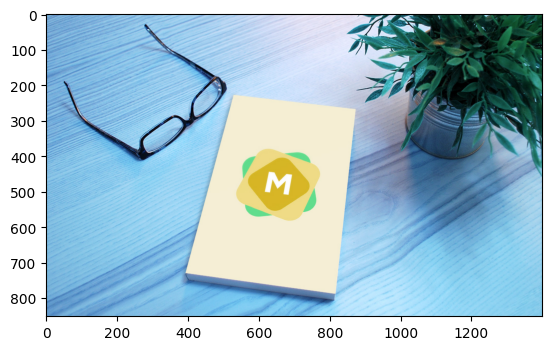

In [13]:
image_path = "./Homography/desk-perspective.png"
image = cv2.imread(image_path)
fig = plt.figure()
plt.imshow(image)

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print(ix, iy)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [14]:
fig.canvas.mpl_disconnect(cid)

In [15]:
persp_img = cv2.imread("./Homography/desk-perspective.png")
norm_img = cv2.imread("./Homography/desk-normal.png")

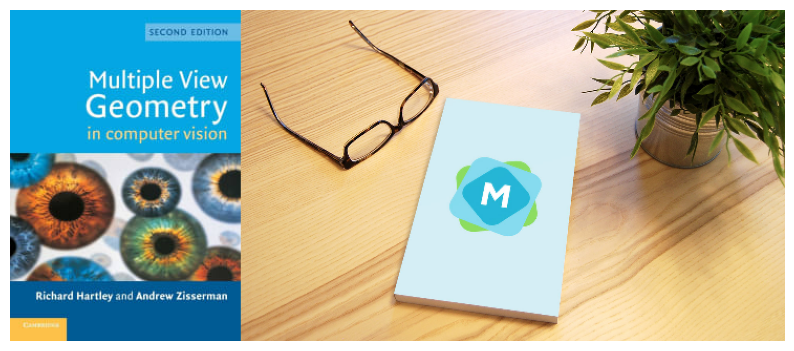

In [17]:
two_imgs = hconcat_resize([norm_img, persp_img])
two_imgs_rgb = cv2.cvtColor(two_imgs, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(two_imgs_rgb)
plt.axis("off")
plt.show()

In [18]:
# Define the corners of the perspective image where the normal image will be overlayed
# You need to define these corners manually or using some annotation tool
corners_perspective = np.array([[530.14, 235.25], [874.5, 271.95], [818.04, 791.30], [394.66, 732.03]], dtype=np.float32)

# Define the corners of the normal image
h, w = norm_img.shape[:2]
corners_normal = np.array([[0, 0], [w, 0], [w, h], [0, h]], dtype=np.float32)

# Compute the homography matrix
homography_matrix, _ = cv2.findHomography(corners_normal, corners_perspective)
# Warp the normal image to the perspective image using the homography
warped_normal_image = cv2.warpPerspective(norm_img, homography_matrix, (persp_img.shape[1], persp_img.shape[0]))

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

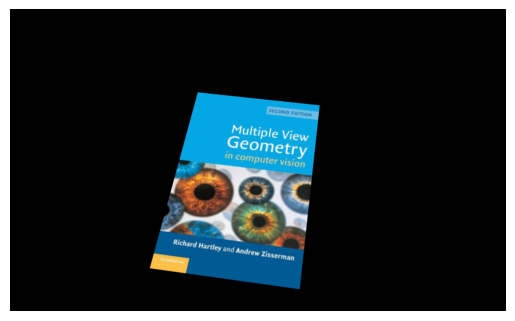

In [19]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(warped_normal_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [20]:
# Create a mask for the overlay
overlay_mask = np.ones_like(persp_img, dtype=np.uint8) * 255

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

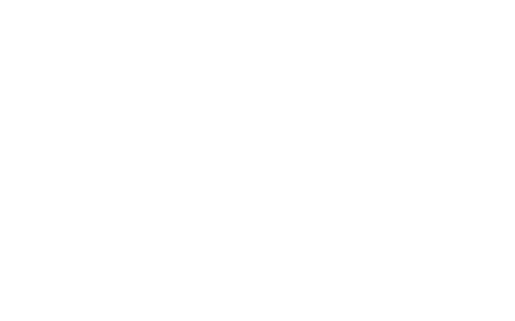

In [21]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [22]:
cv2.fillConvexPoly(overlay_mask, corners_perspective.astype(np.int32), (0, 0, 0))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(np.float64(-0.5), np.float64(1399.5), np.float64(851.5), np.float64(-0.5))

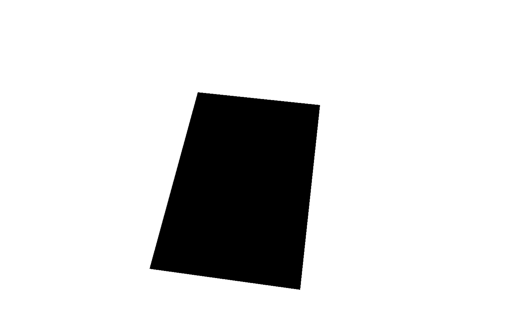

In [23]:
fig = plt.figure()
plt.imshow(cv2.cvtColor(overlay_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [24]:
# Overlay the warped normal image onto the perspective image
overlaid_image = persp_img.copy()
overlaid_image[overlay_mask == 0] = warped_normal_image[overlay_mask == 0]

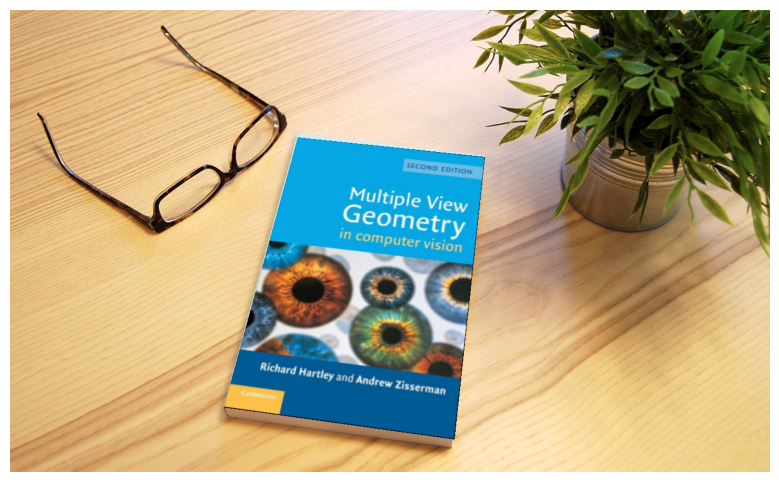

In [25]:
overlaid_image_rgb = cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(overlaid_image_rgb)
plt.axis("off")
plt.show()